# Testing 

In [28]:
import pandas as pd
import numpy as np
import sys

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

from sklearn import cluster, covariance, manifold

In [29]:
df = pd.read_csv("c:/Users/eriko/OneDrive - NTNU/ntnu/fag/prosjekt/TCN/revenue/data/processed_companies.csv", index_col=0).T

### Only N largest companies

In [30]:
N = 10000

In [31]:
df["mean"] = df.mean(axis=1)

In [32]:
df = df.nlargest(N, "mean")
df.shape

(10000, 53)

In [33]:
df = df.T
df = df / df.std(axis=0)


In [34]:
df.head()

,"Samsung Electronics Co., Ltd.",PT Astra International Tbk,"Hyundai Motor Co., Ltd.",PT Telekomunikasi Indonesia (Persero) Tbk,Petrovietnam Gas JSC,PT Bank Mandiri (Persero) Tbk,Vingroup JSC,PT Indofood Sukses Makmur Tbk,"LG Electronics, Inc.",POSCO,...,"Lanpec Technologies Co., Ltd.","Shenzhen SEG Co., Ltd.","Hiyes International Co., Ltd.","I-Remit, Inc.","Hithink RoyalFlush Information Network Co., Ltd.","Diodes, Inc.",Avid Electronics Corp.,"Visionox Technology, Inc.","Choice Hotels International, Inc.",CANCOM SE
2007-03-31,NaN,NaN,NaN,2.143081,NaN,NaN,NaN,NaN,0.941142,1.507624,...,NaN,1.627766,NaN,NaN,NaN,1.314400,NaN,NaN,2.177682,NaN
2007-06-30,NaN,NaN,NaN,2.280016,NaN,NaN,NaN,NaN,0.920793,1.518788,...,NaN,1.365223,NaN,NaN,NaN,1.371548,NaN,NaN,2.947380,NaN
2007-09-30,NaN,NaN,NaN,2.279043,NaN,NaN,NaN,NaN,0.887537,1.532209,...,NaN,0.565926,NaN,NaN,NaN,1.500130,NaN,NaN,3.304070,NaN
2007-12-31,NaN,NaN,NaN,2.140157,NaN,NaN,NaN,NaN,5.584071,1.702646,...,NaN,0.577594,NaN,NaN,NaN,1.528704,NaN,NaN,3.097565,NaN
2008-03-31,NaN,NaN,NaN,2.227901,NaN,NaN,NaN,NaN,1.080515,1.208278,...,NaN,0.408400,NaN,NaN,NaN,1.357261,NaN,NaN,2.402960,NaN


In [35]:
X = df.fillna(0).values

In [10]:
# Learn a graphical structure from the correlations
edge_model = covariance.GraphicalLassoCV(verbose=True)

# standardize the time series: using correlations rather than covariance
# is more efficient for structure recovery

edge_model.fit(X)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[GraphicalLassoCV] Done refinement  1 out of 4:  95s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[GraphicalLassoCV] Done refinement  2 out of 4:  189s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  3.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[GraphicalLassoCV] Done refinement  3 out of 4:  416s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.2min finished
[GraphicalLassoCV] Done refinement  4 out of 4:  485s


GraphicalLassoCV(alphas=4, assume_centered=False, cv=None, enet_tol=0.0001,
                 max_iter=100, mode='cd', n_jobs=None, n_refinements=4,
                 tol=0.0001, verbose=True)

In [36]:
names = df.columns

In [18]:
# Cluster using affinity propagation
_, labels = cluster.affinity_propagation(edge_model.covariance_)
n_labels = labels.max()

for i in range(n_labels + 1):
    print('Cluster %i: %s' % ((i + 1), ', '.join(names[labels == i])))

In [19]:
labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [13]:
# Find a low-dimension embedding for visualization: find the best position of
# the nodes (the stocks) on a 2D plane

# We use a dense eigen_solver to achieve reproducibility (arpack is
# initiated with random vectors that we don't control). In addition, we
# use a large number of neighbors to capture the large-scale structure.
node_position_model = manifold.LocallyLinearEmbedding(
    n_components=2, eigen_solver='dense', n_neighbors=6)

embedding = node_position_model.fit_transform(X.T).T

In [37]:
node_position_model = manifold.TSNE(
    n_components=2, verbose=1)

embedding = node_position_model.fit_transform(X.T).T

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.148s...
[t-SNE] Computed neighbors for 10000 samples in 7.969s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.945194
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.620094
[t-SNE] KL divergence after 1000 iterations: 1.463585


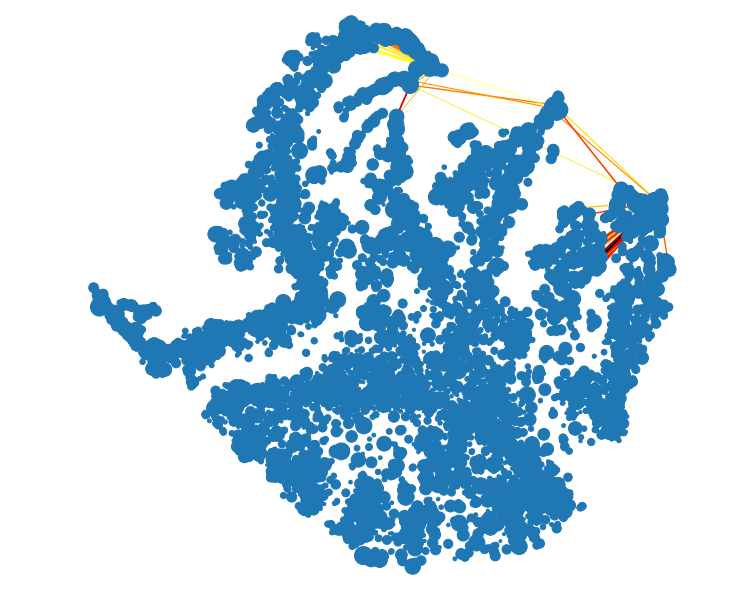

In [41]:
# Visualization
plt.figure(1, facecolor='w', figsize=(10, 8))
plt.clf()
ax = plt.axes([0., 0., 1., 1.])
plt.axis('off')

# Display a graph of the partial correlations
partial_correlations = edge_model.precision_.copy()
d = 1 / np.sqrt(np.diag(partial_correlations))
partial_correlations *= d
partial_correlations *= d[:, np.newaxis]
non_zero = (np.abs(np.triu(partial_correlations, k=1)) > 0.02)

# Plot the nodes using the coordinates of our embedding
plt.scatter(embedding[0], embedding[1], s=10 * d ** 2, #c=labels,
            cmap=plt.cm.nipy_spectral)

# Plot the edges
start_idx, end_idx = np.where(non_zero)
# a sequence of (*line0*, *line1*, *line2*), where::
#            linen = (x0, y0), (x1, y1), ... (xm, ym)
segments = [[embedding[:, start], embedding[:, stop]]
            for start, stop in zip(start_idx, end_idx)]
values = np.abs(partial_correlations[non_zero])
lc = LineCollection(segments,
                    zorder=0, cmap=plt.cm.hot_r,
                    norm=plt.Normalize(0, .7 * values.max()))
lc.set_array(values)
lc.set_linewidths(15 * values)
ax.add_collection(lc)

plt.xlim(embedding[0].min() - .15 * embedding[0].ptp(),
         embedding[0].max() + .10 * embedding[0].ptp(),)
plt.ylim(embedding[1].min() - .03 * embedding[1].ptp(),
         embedding[1].max() + .03 * embedding[1].ptp())

plt.show()

In [46]:
df_plot = pd.DataFrame({"x": embedding[0], "y": embedding[1],  "name":names})#"color": labels,"size": d *10, 

In [50]:
import plotly.graph_objects as go
import pandas as pd

fig = go.Figure(data=go.Scatter(x=df_plot["x"],
                                y=df_plot["y"],
                                mode='markers',
                                #marker=dict(size=df_plot["size"], color=df_plot["color"]),
                                text=df_plot["name"])) # hover text goes here

fig.update_layout(title='Embeddings TSNE')
fig.show()